## **演示0701：单变量线性回归**

### **提出问题**
假设某披萨店的披萨价格和披萨直径之间有下列数据关系：  
![](../images/070101.png)  
根据上面的训练数据，我们能否推断(预测)出某个直径的披萨可能的售价呢？例如，12英寸的披萨可能售卖多少钱？

### **分析问题**
把直径看成自变量$x$(以后也称**特征值**)，价格看成因变量$y$，可以先通过作图看出二者的关系：

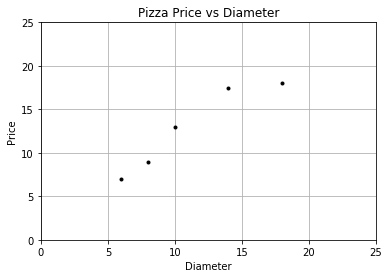

In [1]:
''' 查看样本数据 '''

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def initPlot():
    plt.figure()
    plt.title('Pizza Price vs Diameter')
    plt.xlabel('Diameter')
    plt.ylabel('Price')
    plt.axis([0, 25, 0, 25])        # 设置x轴和y轴的值域均为0~25
    plt.grid(True)
    return plt

plt = initPlot()
xTrain = np.array([6,8,10,14,18])
yTrain = np.array([7,9,13,17.5,18])
plt.plot(xTrain, yTrain, 'k.')
plt.show();

可以看到：  
* 价格$y$随着直径$x$的变化，大致呈现线性变化；
* 如果根据现有的训练数据能够拟合出一条直线，使之与这些训练数据的各点都比较接近，那么根据该直线，就可以计算出在任意直径披萨的价格

### **解决方案**
采用Python scikit-learn库中提供的sklearn.linear_model.LinearRegression对象来进行线性拟合  
* 思路  
拟合出来的直线可以表示为：$ h_\theta(x)=\theta_0 x_0+ \theta_1 x_1=\theta_0+ \theta_1 x_1 $
 * $x_0$ 表示Intercept Term，一般设置为1即可
 * $x_1$ 表示影响计算结果的的第一个因素(或称特征，在本例中就是直径)。在单变量线性回归中，只有$x_1$
 * $\theta_0$表示截距，$\theta_1$表示斜率。这两个参数都是需要通过拟合求出来的
 * $h_\theta(x)$称为**判别函数**(Hypothesis Function)或**判别式**，也就是线性拟合的模型结果函数  
* 步骤
 * 准备训练数据  
   <code>xTrain = np.array([6,8,10,14,18])[:, np.newaxis]  
yTrain = np.array([7,9,13,17.5,18])</code>  
  LinearRegression支持单变量和多变量回归。对于多变量回归，xTrain显然是矩阵形式。因此，即使只有一个变量，LinearRegression也要求输入的特征值以矩阵形式(列向量)存在。  
  在使用LinearRegression时，不需要显式设置Intercept Item；它会自动扩展该列  
 * 创建模型对象  
   <code>model = LinearRegression()</code>  
 * 执行拟合  
   <code>hypothesis = model.fit(xTrain, yTrain)</code>  
  判别函数(hypothesis)对象中包含了大量的属性和方法，可用于针对该模型的后续操作
 * 获取判别函数的参数(截距和斜率)  
   <code>print("theta0=", hypothesis.intercept_)  
print("theta1=", hypothesis.coef_)</code>  
 * 预测新的数据  
   <code>model.predict([[12]])  
model.predict([[0],[10],[14],[25]])</code>  
  将待预测的数据放置在一个矩阵(或列向量)中，可以批量预测多个数据
* 结果  
  根据判别函数，绘制拟合直线，并同时显示训练数据点。  
  拟合的直线较好的穿过训练数据，根据新拟合的直线，可以方便的求出各个直径下对应的价格(预测结果)。

theta0= 1.965517241379315
theta1= [0.9762931]
预测直径12的披萨价格： [13.68103448]
预测新数据： [[ 0]
 [10]
 [14]
 [25]]
预测结果： [ 1.96551724 11.72844828 15.63362069 26.37284483]


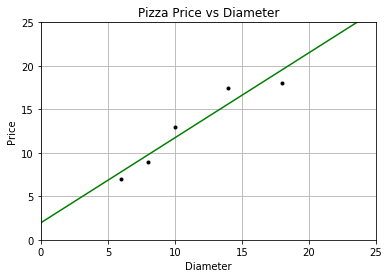

In [2]:
''' 使用LinearRegression进行线性回归、预测，并作图显示结果 '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

xTrain = np.array([6,8,10,14,18])[:,np.newaxis]     # 应以矩阵形式表达(对于单变量，矩阵就是列向量形式)
yTrain = np.array([7,9,13,17.5,18])     # 为方便理解，也转换成列向量

model = LinearRegression()                  # 创建模型对象
hypothesis = model.fit(xTrain, yTrain)      # 根据训练数据拟合出直线(以得到假设函数)
print("theta0=", hypothesis.intercept_)     # 截距
print("theta1=", hypothesis.coef_)          # 斜率
        
print("预测直径12的披萨价格：", model.predict([[12]]))    # 预测直径为12的披萨价格
xNew = np.array([0, 10, 14, 25])[:,np.newaxis]            # 也可以批量预测多个直径，注意要以列向量形式表达
yNew = model.predict(xNew)
print("预测新数据：", xNew)
print("预测结果：",yNew)

def initPlot():
    plt.figure()
    plt.title('Pizza Price vs Diameter')
    plt.xlabel('Diameter')
    plt.ylabel('Price')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = initPlot()
plt.plot(xTrain, yTrain, 'k.')
plt.plot(xNew, yNew, 'g-')                  # 画出通过这些点的连续直线
plt.show()

### **模型评价**
拟合出来的判别函数效果如何：对训练数据的贴合度如何？对新数据的预测准确度如何？  
先给出下列定义：
* 残差(residuals)：判别函数计算结果与实际结果之间的差异，如下图中的红色线段部分。一般是计算残差平方和  
![](../images/070102.png)  
* R方(r-squared)：又称确定系数(coefficient of determination)。在通过训练数据得出了判别函数后，对于新的数据，如何评估该假设函数的表现呢？可以使用与训练数据不同的另一组数据（称为检验/测试数据）来进行评估。R方就是用来进行评估的一种计算方法。在Pyhton的scikit-learn中，是这样定义R方的（针对给定的测试数据）：  
$ SS_{tot}=\sum_{i=1}^m (y^{(i)} - \overline y)^2 $  
$ SS_{res}=\sum_{i=1}^m [y^{(i)} - h_\theta(x^{(i)})]^2 $  
$ R^2=1 - \dfrac{SS_{res}}{SS_{tot}}$  
 * $m$：测试数据集中的数据组数
 * $y^{(i)}$：测试数据集中第$i$组数据的$y$值（实际价格）
 * $\overline y$：测试数据集中$y$的平均值
 * $h_\theta(x^{(i)})$：将$x^{(i)}$代入到判别函数计算的结果，也就是根据模型算出的$y$值（计算价格）
 * $SS_{tot}$：针对测试数据计算出来偏差平方和
 * $SS_{res}$：针对测试数据计算出来的残差平方和
 * 一般来说，R方越大(不会超过1)，说明模型效果越好。如果R方较小或为负，说明效果很差
* 在Python中如何对单变量线性回归模型的效果进行评估
 * 手动计算  
 假设hpyTrain代表针对训练数据的预测$y$值，hpyTest代表针对测试数据的预测$y$值
   * 训练数据残差平方和：<code>ssResTrain = sum((hpyTrain - yTrain) ** 2)</code>
   * 测试数据残差平方和：<code>ssResTest = sum((hpyTest - yTest) ** 2)</code>
   * 测试数据偏差平方和：<code>ssTotTest = sum((yTest - np.mean(yTest)) ** 2)</code>
   * R方：<code>Rsquare = 1 - ssResTest / ssTotTest</code>
 * LinearRegression对象提供的方法
   * 训练数据残差平方和：<code>model._residues</code>
   * R方：<code>model.score(xTest, yTest)</code>

8.747844827586203
8.747844827586203
0.6620052929422553
0.6620052929422553
[[1.         0.95394004]
 [0.95394004 1.        ]]
[[1.         0.81584704]
 [0.81584704 1.        ]]


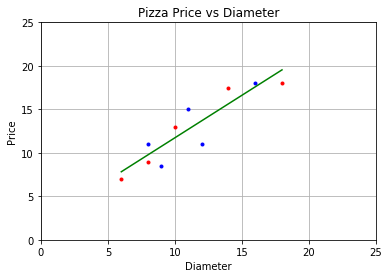

In [3]:
''' 计算模型的效果 '''

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

xTrain = np.array([6,8,10,14,18])[:,np.newaxis]         # 训练数据(直径)
yTrain = np.array([7,9,13,17.5,18])                     # 训练数据(价格)
xTest = np.array([8,9,11,16,12])[:,np.newaxis]          # 测试数据(直径)
yTest = np.array([11,8.5,15,18,11])                     # 测试数据(价格)

model = LinearRegression()
hypothesis = model.fit(xTrain, yTrain)
hpyTrain = model.predict(xTrain)
hpyTest = model.predict(xTest)                          # 针对测试数据进行预测

ssResTrain = sum((hpyTrain - yTrain)**2)                # 手动计算训练数据集残差
print(ssResTrain)                                       # 8.7478
print(model._residues)                                  # Python计算的训练数据集残差

ssResTest = sum((hpyTest - yTest)**2)                   # 手动计算测试数据集残差
ssTotTest = sum((yTest - np.mean(yTest))**2)            # 手动计算测试数据集y值偏差平方和
Rsquare = 1 - ssResTest / ssTotTest                     # 手动计算R方
print(Rsquare)                                          # 0.662
print(model.score(xTest, yTest))                        # Python计算的训练数据集的R方

# corrcoef函数是在各行元素之间计算相关性，所以x和y都应是行向量
print(np.corrcoef(xTrain.T, yTrain.T))            # 计算训练数据的相关性：0.954
print(np.corrcoef(xTest.T, yTest.T))              # 计算测试数据的相关性：0.816

def initPlot():
    plt.figure()
    plt.title('Pizza Price vs Diameter')
    plt.xlabel('Diameter')
    plt.ylabel('Price')
    plt.axis([0, 25, 0, 25])
    plt.grid(True)
    return plt

plt = initPlot()
plt.plot(xTrain, yTrain, 'r.')          # 训练点数据(红色)
plt.plot(xTest, yTest, 'b.')            # 测试点数据(蓝色)
plt.plot(xTrain, hpyTrain, 'g-')        # 假设函数直线(绿色)
plt.show()

查看上述拟合效果：  
* 红色为训练数据点，蓝色为测试数据点，绿色为判别函数(拟合直线)
* 计算出的R方为0.662，效果一般
* 计算出训练数据的相关性为0.954，测试数据的相关性为0.816。可以发现，根据数据集的不同，直径与价格之间的相关性波动较大。这也能解释为何针对测试数据的R方事实上不够理想